    Apply ANN on fruit 365 dataset to classify with accuracy of 90%

    1. create ANN based model
    2. use required hyper parameters according to required task
    3. add layers if required
 
    Explain complete task accordingly

In [1]:
## import necessary libraries

import os
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report ,accuracy_score ,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
import joblib
import matplotlib.pyplot as plt
import cv2

In [2]:
## listdir() will print folders in path directory
print(os.listdir("../OpenCvDataSet/fruits-360-original-size/fruits-360-original-size/Training"))

['apple_6', 'apple_braeburn_1', 'apple_crimson_snow_1', 'apple_golden_1', 'apple_golden_2', 'apple_golden_3', 'apple_granny_smith_1', 'apple_hit_1', 'apple_pink_lady_1', 'apple_red_1', 'apple_red_2', 'apple_red_3', 'apple_red_delicios_1', 'apple_red_yellow_1', 'apple_rotten_1', 'cabbage_white_1', 'carrot_1', 'cucumber_1', 'cucumber_3', 'eggplant_violet_1', 'pear_1', 'pear_3', 'zucchini_1', 'zucchini_dark_1']


In [3]:
## Folder paths in training data which have different fruit image data in it

folder_paths = [
    r"D:\Python Languages\Navttac AI course\OpenCvDataSet\fruits-360-original-size\fruits-360-original-size\Training\apple_6",
    r"D:\Python Languages\Navttac AI course\OpenCvDataSet\fruits-360-original-size\fruits-360-original-size\Training\apple_braeburn_1",
     r"D:\Python Languages\Navttac AI course\OpenCvDataSet\fruits-360-original-size\fruits-360-original-size\Training\pear_3",
     r"D:\Python Languages\Navttac AI course\OpenCvDataSet\fruits-360-original-size\fruits-360-original-size\Training\cucumber_1",
    ]

In [4]:
dataset = []

for i in folder_paths:
    folder_name = os.path.basename(i)
    for file_name in os.listdir(i):
        
        path = os.path.join(i,file_name)
        if os.path.isfile(path):
            img = cv2.imread(path , cv2.IMREAD_GRAYSCALE)
            
            if img is not None:
                img_res = cv2.resize(img, (250,250))
                flatten_img = img_res.flatten()
                
                flattened_image = img_res.flatten().tolist()
                dataset.append(flattened_image + [folder_name])
        

In [5]:
## convert the matrix into dataFrame and change last column name into Label 

img_df = pd.DataFrame(data =dataset)
img_df.rename(columns={img_df.iloc[:, -1].name : "label"},inplace=True)
img_df


,0,1,2,3,4,5,6,7,8,9,...,62491,62492,62493,62494,62495,62496,62497,62498,62499,label
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_6
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_6
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_6
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_6
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,cucumber_1
875,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,cucumber_1
876,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,cucumber_1
877,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,cucumber_1


In [6]:
## store file to csv
img_df.to_csv("../OpenCvDataSet/image_dataframe.csv",index = False)

In [7]:
## Count the label value in row
y = img_df.iloc[: , -1]
y.value_counts()

apple_braeburn_1    320
apple_6             315
pear_3              144
cucumber_1          100
Name: label, dtype: int64

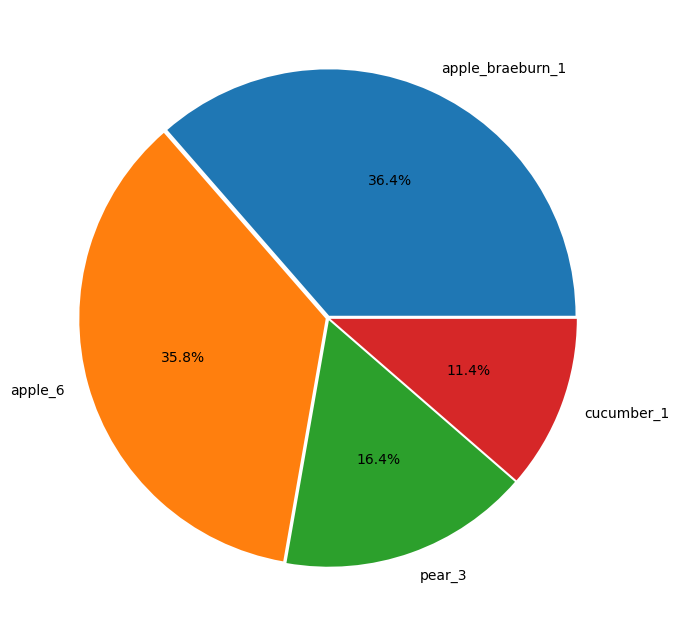

In [8]:
## Show the pie chart of label data 
plt.figure(figsize=(8,8))
plt.pie(y.value_counts(),labels=y.value_counts().index,autopct='%1.1f%%',explode = [0.01 for i in range(len(y.value_counts()))]);


Text(0, 0.5, 'Images')

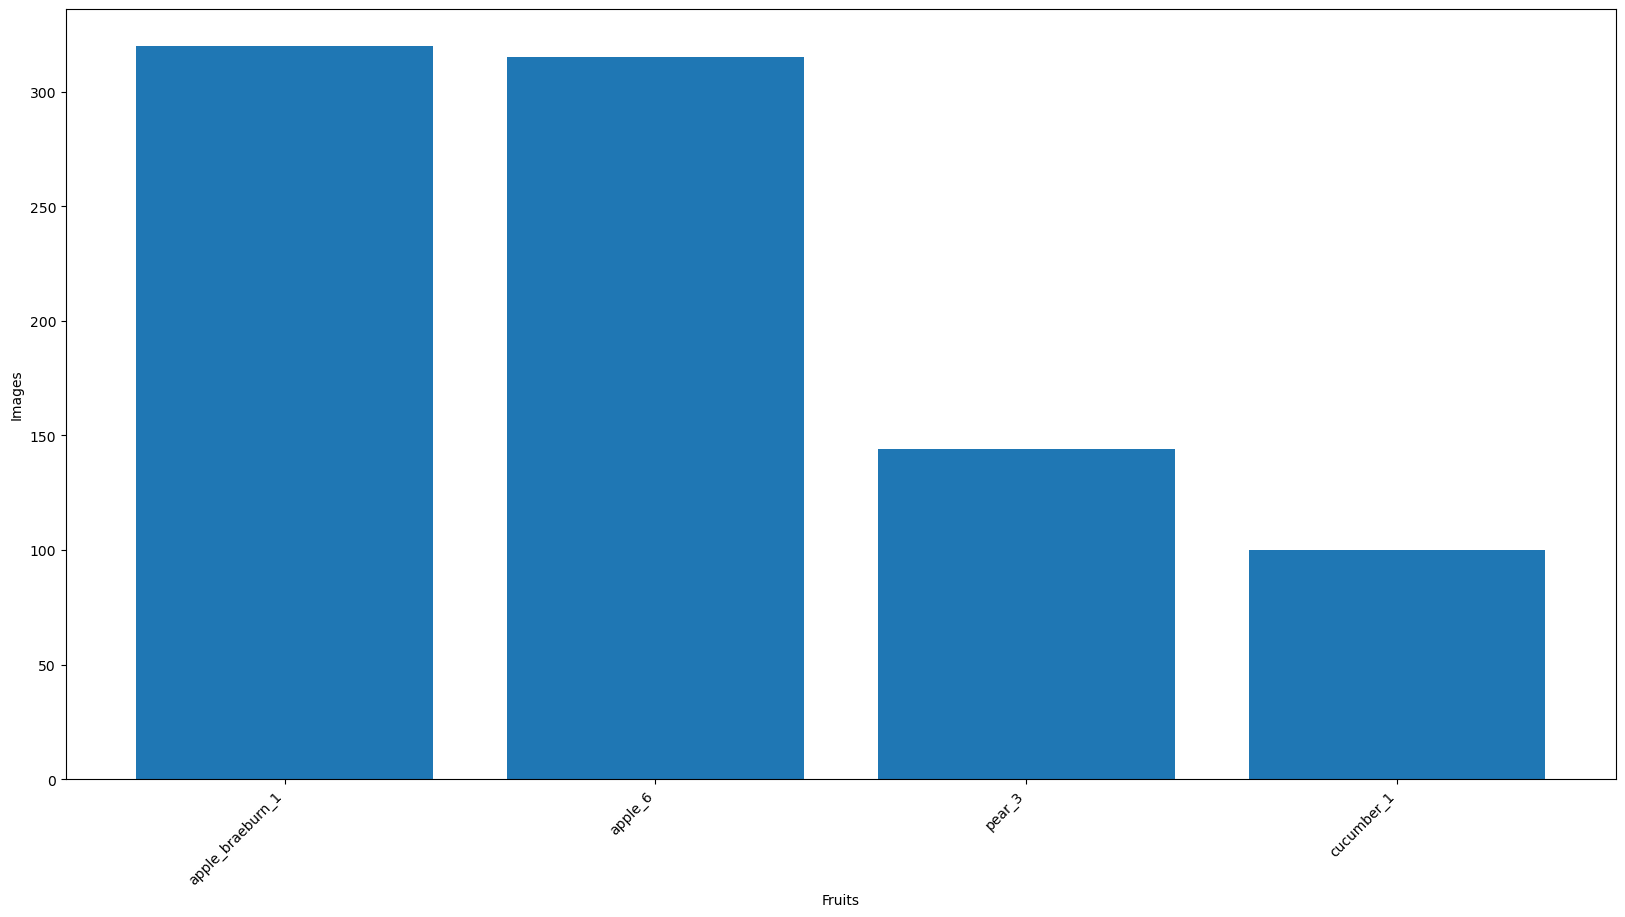

In [9]:
## show the bar graph of Label Data
plt.figure(figsize=(20,10))
plt.bar(y.value_counts().index, y.value_counts().values ,)
plt.xticks(rotation=45, ha='right');
plt.xlabel("Fruits")
plt.ylabel("Images")


In [10]:
x = img_df.drop("label" , axis =1)
y = img_df.iloc[:,-1]

In [11]:
## scale the Values in Range of 0 to 1 & label encode the value of y


x_scaled = x/255
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
encoder.classes_

array(['apple_6', 'apple_braeburn_1', 'cucumber_1', 'pear_3'],
      dtype=object)

In [12]:
## Train Test split

x_train ,x_test ,y_train ,y_test  =  train_test_split(x_scaled , y_encoded ,test_size = 0.2 ,random_state = 42)
x_train.shape,y_train.shape

((703, 62500), (703,))

# Deep Learning

In [13]:
import tensorflow as tf
from tensorflow.keras import Sequential  ## used for init our ANN model
from keras.layers import Dense  ## used for different layer structure

In [14]:
## Save the sequential function into classifier
## he Sequential class allows us to build ANN but as a sequence of layers.
model = Sequential()

# Add a dense layer with 128 units and 'relu' activation function as the input layer
model.add(Dense(128, activation='relu', input_shape=(250*250,)))

# Add another dense layer with 64 units and 'relu' activation function
model.add(Dense(64, activation='relu'))

# Add the output layer with the number of classes (number of unique labels) and 'softmax' activation function
model.add(Dense(len(encoder.classes_), activation='softmax'))

# Compile the model with 'categorical_crossentropy' loss function and 'adam' optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               8000128   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 8008644 (30.55 MB)
Trainable params: 8008644 (30.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
## Encode y_labels using onehotencoder

from keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test) 
model.fit(x_train ,y_train_encoded ,batch_size = 32 ,epochs = 10 ,validation_split = 0.2)


Epoch 1/10
18/18 [==============================] - 6s 252ms/step - loss: 6.5220 - accuracy: 0.6050 - val_loss: 1.3113 - val_accuracy: 0.7305
Epoch 2/10
18/18 [==============================] - 3s 175ms/step - loss: 0.4202 - accuracy: 0.9110 - val_loss: 0.0531 - val_accuracy: 0.9787
Epoch 3/10
18/18 [==============================] - 3s 176ms/step - loss: 0.0251 - accuracy: 0.9893 - val_loss: 7.2317e-05 - val_accuracy: 1.0000
Epoch 4/10
18/18 [==============================] - 3s 176ms/step - loss: 4.3871e-05 - accuracy: 1.0000 - val_loss: 2.4241e-05 - val_accuracy: 1.0000
Epoch 5/10
18/18 [==============================] - 3s 167ms/step - loss: 5.4403e-05 - accuracy: 1.0000 - val_loss: 2.5259e-05 - val_accuracy: 1.0000
Epoch 6/10
18/18 [==============================] - 3s 167ms/step - loss: 4.9184e-05 - accuracy: 1.0000 - val_loss: 2.0866e-05 - val_accuracy: 1.0000
Epoch 7/10
18/18 [==============================] - 3s 166ms/step - loss: 3.8395e-05 - accuracy: 1.0000 - val_loss: 1.77

In [16]:
## Predict the value

y_predict_encoded = model.predict(x_test)
y_pred = np.argmax(y_predict_encoded,axis = 1)


6/6 [==============================] - 0s 24ms/step


In [17]:
y_test,y_pred

(array([1, 0, 2, 1, 0, 3, 1, 1, 2, 0, 1, 3, 2, 1, 1, 0, 1, 0, 0, 3, 3, 1,
        2, 0, 0, 3, 2, 0, 3, 0, 0, 2, 0, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 3, 1, 2, 3, 0, 2, 3, 0,
        1, 1, 2, 3, 2, 1, 0, 1, 1, 2, 1, 0, 3, 3, 1, 1, 1, 0, 3, 1, 1, 1,
        2, 1, 2, 1, 2, 0, 0, 1, 3, 1, 3, 3, 0, 1, 0, 1, 0, 0, 1, 3, 0, 2,
        0, 1, 1, 0, 1, 1, 1, 1, 3, 0, 1, 0, 1, 2, 0, 0, 1, 3, 1, 2, 1, 1,
        0, 0, 3, 3, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 3, 1, 3,
        0, 3, 2, 1, 1, 0, 0, 0, 1, 3, 0, 3, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0]),
 array([1, 0, 2, 1, 0, 3, 1, 1, 2, 0, 1, 3, 2, 1, 1, 0, 1, 0, 0, 3, 3, 1,
        2, 0, 0, 3, 2, 0, 3, 0, 0, 2, 0, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 3, 1, 2, 3, 0, 2, 3, 0,
        1, 1, 2, 3, 2, 1, 0, 1, 1, 2, 1, 0, 3, 3, 1, 1, 1, 0, 3, 1, 1, 1,
        2, 1, 2, 1, 2, 0, 0, 1, 3, 1, 3, 3, 0, 1, 0, 1, 0, 0, 1, 3, 0, 2,
        0, 1, 1, 0, 1, 1, 1, 1, 3, 0

In [18]:
## Evaluation Metrics
print("Confusion Matric\n",confusion_matrix(y_test , y_pred))

print("\n\nAccuracy_score:" , accuracy_score(y_test ,y_pred))

Confusion Matric
 [[62  0  0  0]
 [ 0 65  0  0]
 [ 0  0 23  0]
 [ 0  0  0 26]]


Accuracy_score: 1.0


In [19]:
joblib.dump(model , "../TrainedModels/fruit360model.pkl")
joblib.dump(encoder , "../TrainedModels/LabelEncoder.pkl")

['../TrainedModels/DL_ANN_Classifier_LabelEncoder.pkl']

## Deployment

In [20]:
## import model and encoder 
model1   =  joblib.load("../TrainedModels/fruit360model.pkl")
encoder1 = joblib.load("../TrainedModels/LabelEncoder.pkl")

1/1 [==============================] - 0s 131ms/step


The fruit is pear_3


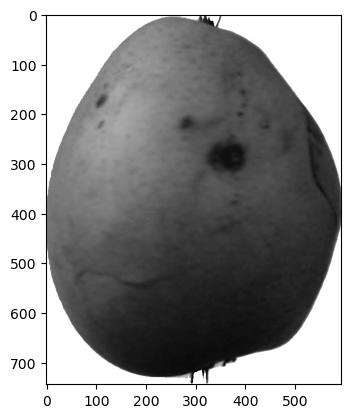

In [21]:
##  Make function for preprocessing and predicting
labels = {i:label for i,label in enumerate(encoder1.classes_)}

def preprocessing(path):
    input_img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    global  imgsh
    imgsh  = input_img
    resized_input_image = cv2.resize(input_img, (250, 250))
    flattened_input_image = resized_input_image.flatten().tolist()
    ##Scale the image before converting it into dataFrame
    return pd.DataFrame(np.array([flattened_input_image]) / 255)


def prediction(path):
    y_preprocessed = preprocessing(path)
    y = model1.predict(y_preprocessed)
    y_max = np.argmax(y)
    return y_max


y_p = prediction("../OpenCvDataSet/fruits-360-original-size/fruits-360-original-size/Test/pear_3/r0_115.jpg")
print("\n\nThe fruit is",labels[y_p])
plt.imshow(cv2.cvtColor(imgsh,cv2.COLOR_BGR2RGB) )
    